In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
mails = pd.read_csv('messages.csv')

In [3]:
mails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [4]:
mails.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [5]:
#drop the subject column
mails.drop('subject',axis=1,inplace=True)

In [6]:
#Let us add a new column with length of messages in each row :
mails['length'] = mails.message.str.len()

In [7]:
#0 - it is not a spam email
#1- it is a spam email
mails['label'].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [8]:
#Ratio : 
non_spam_ratio =  (len(mails[mails['label']==0])/ len(mails.label))*100
spam_ratio =  (len(mails[mails['label']==1])/ len(mails.label))*100
print('Non-Spam messages ratio = ', round(non_spam_ratio,2),'%')
print('Spam messages ratio = ', round(spam_ratio,2),'%')

Non-Spam messages ratio =  83.37 %
Spam messages ratio =  16.63 %


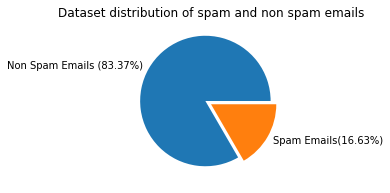

In [9]:
#Plot a pie chart showing difference of 

x= np.array([round(non_spam_ratio,2),round(spam_ratio,2)])
mylabels = ['Non Spam Emails (83.37%)', 'Spam Emails(16.63%)']
myexplode = [0.1,0]

plt.figure(figsize=(3,3))
plt.pie(x,labels=mylabels,explode=myexplode)
plt.title("Dataset distribution of spam and non spam emails")
plt.show()

In [10]:
#Convert all the messages to lower case :
mails['message'] = mails.message.str.lower()

# Regular Expressions : 

In [11]:
#Replace email addresses with emails :
mails['message'] = mails['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
mails['message'] = mails['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
mails['message'] = mails['message'].str.replace(r'£|\$', 'dollars')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
mails['message'] = mails['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'number'
mails['message'] = mails['message'].str.replace(r'\d+(\.\d+)?', 'number')

# Remove punctuation
mails['message'] = mails['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
mails['message'] = mails['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
mails['message'] = mails['message'].str.replace(r'^\s+|\s+?$', '')

#Replace Special characters: 
mails['message'] = mails['message'].str.replace(r'\_ ','')

#Replace * :
mails['message'] = mails['message'].str.replace(r'\* ','')

#Replace nbsp with space
mails['message'] = mails['message'].str.replace(r'nbsp',' ')

In [12]:
unique_words = mails['message'].unique()
len(unique_words)

2846

In [13]:
#Remove Stopwords:
import nltk
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['c','n','g','u','e','h','v','j','b'])

mails['message'] = mails['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [14]:
unique_words = mails['message'].unique()
len(unique_words)

2845

In [15]:
mails['clean_length'] = mails.message.str.len()
mails

,message,label,length,clean_length
0,content length number apple iss research cente...,0,2856,2046
1,lang classification grimes joseph barbara f gr...,0,1800,1469
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1078
3,colleague researching differing degrees risk p...,0,324,208
4,earlier morning phone friend mine living south...,0,1046,629
...,...,...,...,...
2888,hello thanks stopping taken many new pics made...,1,262,132
2889,list owner kiddin invited join mailing list li...,1,2163,1211
2890,judging return post must sounded like kind sel...,0,1039,639
2891,gotcha two separate fallacies argument ary com...,0,2949,1876


In [16]:
# Total length after words removal
print ('Origian Length', mails.length.sum())
print ('Clean Length', mails.clean_length.sum())

Origian Length 9344743
Clean Length 6666198


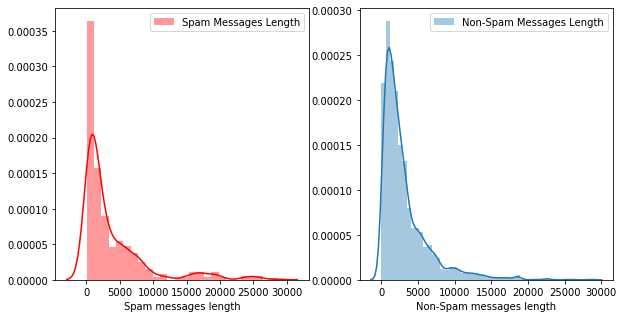

In [17]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize=(10,5))

sns.distplot(mails[mails['label']==1]['length'],ax=ax[0],label='Spam Messages Length',color='r')
ax[0].set_xlabel('Spam messages length')
ax[0].legend()

sns.distplot(mails[mails['label']==0]['length'],ax=ax[1],label='Non-Spam Messages Length')
ax[1].set_xlabel('Non-Spam messages length')
ax[1].legend()

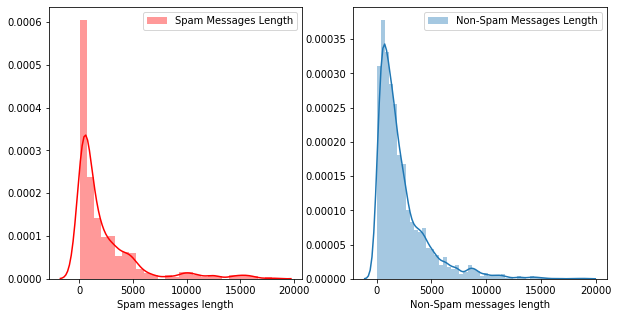

In [18]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize=(10,5))

sns.distplot(mails[mails['label']==1]['clean_length'],ax=ax[0],label='Spam Messages Length',color='r')
ax[0].set_xlabel('Spam messages length')
ax[0].legend()

sns.distplot(mails[mails['label']==0]['clean_length'],ax=ax[1],label='Non-Spam Messages Length')
ax[1].set_xlabel('Non-Spam messages length')
ax[1].legend()

In [19]:
#!pip install wordcloud

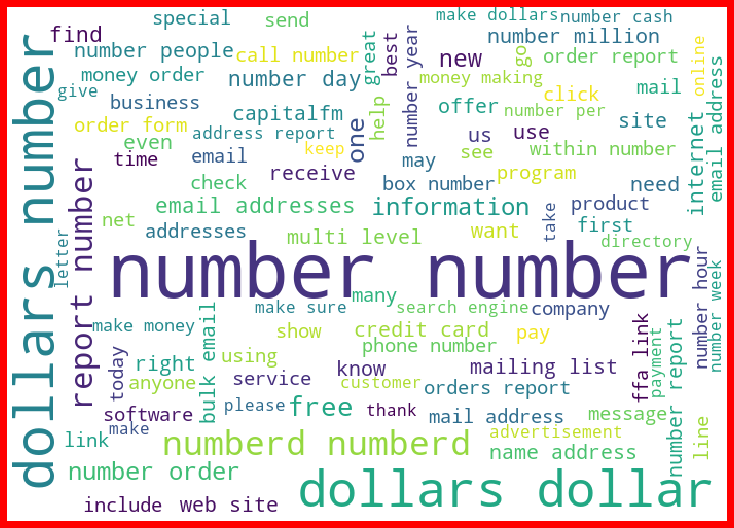

In [20]:
#Word cloud for Spam messages :
from wordcloud import WordCloud

spams = mails['message'][mails['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))

plt.figure(figsize=(10,10),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

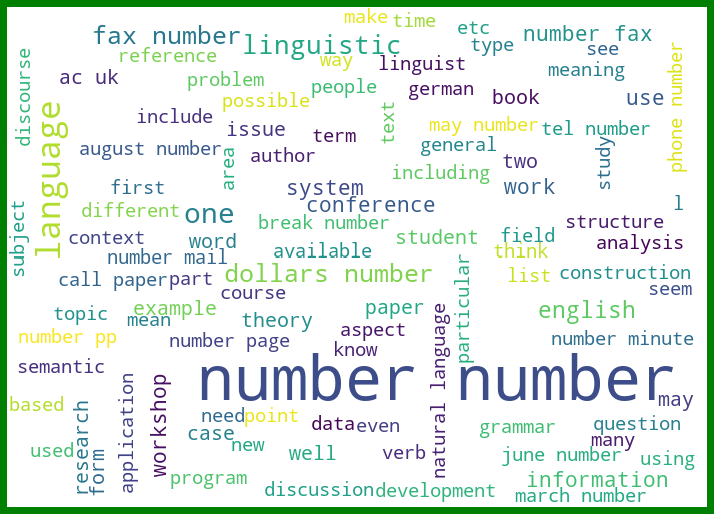

In [21]:
#Word cloud for Non-Spam messages :
from wordcloud import WordCloud

non_spams = mails['message'][mails['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(non_spams))

plt.figure(figsize=(10,10),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

In [22]:
#Converting Text to vectors using TF-IDF vectoriser :
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(mails['message'])

features.shape

(2893, 54998)

In [23]:
#Split the data into training and testing data set: 
from sklearn.model_selection import train_test_split

X = features
y= mails['label']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2314, 54998)
(2314,)
(579, 54998)
(579,)


In [25]:
#Training multiple machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

classifiers = [svc,knc,mnb,dtc,lrc,rfc]

  
    
for i in range(len(classifiers)):
    classifiers[i].fit(x_train,y_train)
    y_pred = classifiers[i].predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    classificationReport = classification_report(y_test,y_pred)
    confusionMatrix = confusion_matrix(y_test,y_pred)
    
    print("\n")
    print("*************************************************************************************")
    print("Classifier : ",classifiers[i])
    print("Accuracy : ",round((accuracy*100),2),"% ")
    print("Classification Report : \n")
    print(classificationReport)
    print("Confusion Matrix :\n ")
    print(confusionMatrix)
    print("*************************************************************************************")
    print("\n")





*************************************************************************************
Classifier :  SVC(gamma=1.0, kernel='sigmoid')
Accuracy :  98.79 % 
Classification Report : 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       464
           1       0.99      0.95      0.97       115

    accuracy                           0.99       579
   macro avg       0.99      0.97      0.98       579
weighted avg       0.99      0.99      0.99       579

Confusion Matrix :
 
[[463   1]
 [  6 109]]
*************************************************************************************




*************************************************************************************
Classifier :  KNeighborsClassifier(n_neighbors=49)
Accuracy :  94.65 % 
Classification Report : 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       464
           1       0.91      0.81      0.86       115

    accur

In [26]:
#We can see that SVC has performed best amongst all the classifiers. We will create the final model with SVC as our classifier :
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
classificationReport = classification_report(y_test,y_pred)
confusionMatrix = confusion_matrix(y_test,y_pred)

print("*************************************************************************************")
print("Classifier : ",svc)
print("Accuracy : ",round((accuracy*100),2),"% ")
print("Classification Report : \n")
print(classificationReport)
print("Confusion Matrix :\n ")
print(confusionMatrix)
print("*************************************************************************************")
print("\n")

*************************************************************************************
Classifier :  SVC(gamma=1.0, kernel='sigmoid')
Accuracy :  98.79 % 
Classification Report : 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       464
           1       0.99      0.95      0.97       115

    accuracy                           0.99       579
   macro avg       0.99      0.97      0.98       579
weighted avg       0.99      0.99      0.99       579

Confusion Matrix :
 
[[463   1]
 [  6 109]]
*************************************************************************************




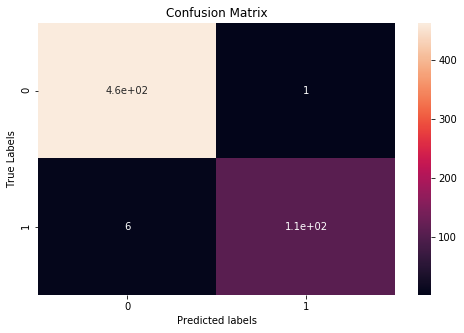

In [27]:
#ax=plt.subplot()
plt.figure(figsize=(8,5))
sns.heatmap(confusionMatrix,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")
#ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
#ax.set_title('Confusion matrix')
#ax.xaxis.set_ticklabels(['Non-Span','spam'])
#ax.yaxis.set_ticklabels(['Non-Span','spam'])
plt.show()

In [28]:
#sample test 1 : 
text1 = ["You will win XXX $"]
text1 = tf_vec.transform(text1)

svc.predict(text1)[0]

1

In [29]:
#sample test 2 : 
text2 = ["Hey, can we discuss in call?"]
text2 = tf_vec.transform(text2)

svc.predict(text2)[0]

0

In [30]:
#save the model 

import joblib

joblib.dump(svc,'spamclassifiermodel.obj')

gradient_from_joblib = joblib.load('spamclassifiermodel.obj')

#final_output = pd.DataFrame(gradient_from_joblib.predict(text2))
